In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/따릉이/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/따릉이/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/따릉이/submission.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [ ]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

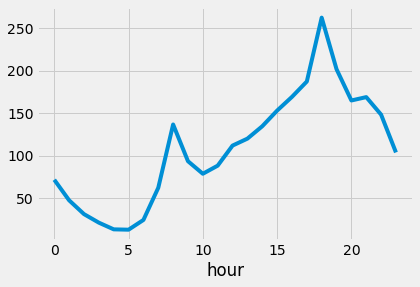

In [ ]:
train.groupby(['hour'])['count'].mean().plot()

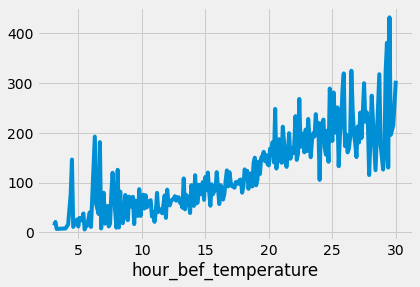

In [ ]:
train.groupby(['hour_bef_temperature'])['count'].mean().plot()

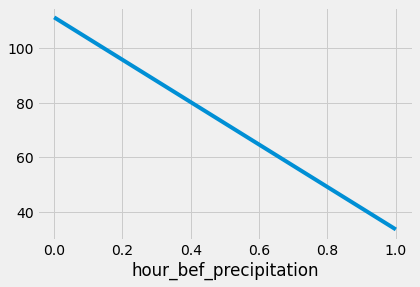

In [ ]:
train.groupby(['hour_bef_precipitation'])['count'].mean().plot()

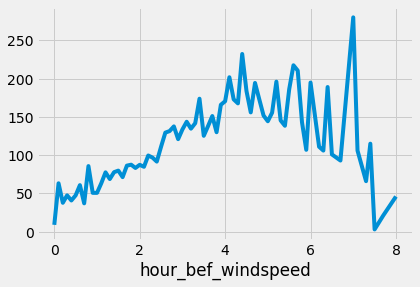

In [ ]:
train.groupby(['hour_bef_windspeed'])['count'].mean().plot()

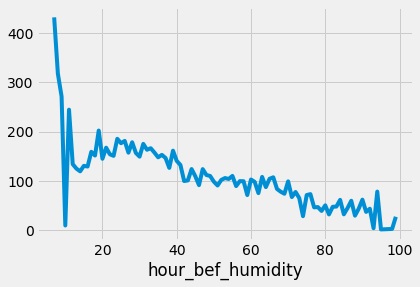

In [ ]:
train.groupby(['hour_bef_humidity'])['count'].mean().plot()

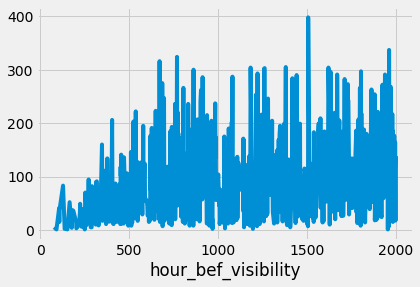

In [ ]:
train.groupby(['hour_bef_visibility'])['count'].mean().plot()

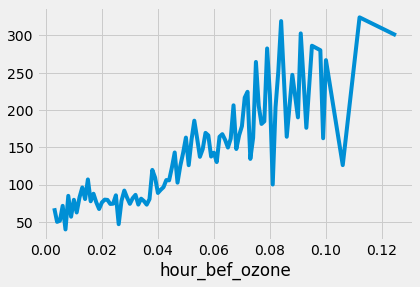

In [ ]:
train.groupby(['hour_bef_ozone'])['count'].mean().plot()

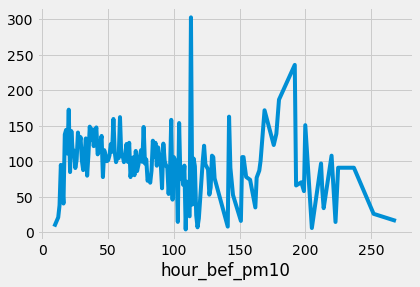

In [ ]:
train.groupby(['hour_bef_pm10'])['count'].mean().plot()

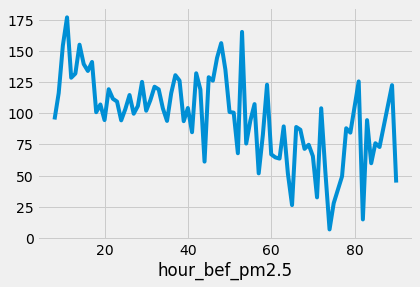

In [ ]:
train.groupby(['hour_bef_pm2.5'])['count'].mean().plot()

In [ ]:
#시간, 기온, 비 여부, 습도, 오존, 미세먼지2.5

In [ ]:
train.fillna(train.median(),inplace=True) #결측치 채우기 -> 중앙값
test.fillna(test.median(),inplace=True)

In [ ]:
#tmp = train['hour_bef_ozone'].copy()
train_x = train.drop(['count'], axis=1)
columns = ['hour','hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_humidity','hour_bef_ozone', 'hour_bef_pm2.5']
train_x = train[columns]
#train_x['hour_bef_ozone'] = tmp*100

#train_x = train_x.astype(int)
train_y = train['count']
#train_y = train_y.astype(int)
test_x = test[columns]
#test_x = test_x.astype(int)

In [ ]:
train_x.shape, train_y.shape, test_x.shape

((1459, 7), (1459,), (715, 7))

In [ ]:
train_x.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_humidity,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,89.0,0.027,76.0,33.0
1,13,20.1,0.0,48.0,0.042,73.0,40.0
2,6,13.9,0.0,79.0,0.033,32.0,19.0
3,23,8.1,0.0,54.0,0.040,75.0,64.0
4,18,29.5,0.0,7.0,0.057,27.0,11.0


In [ ]:
model_dict = {
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(),
    'LGB':lgb.LGBMRegressor(), #LightGBM
    'XGB':xgb.XGBRegressor(), #XGBoost
    'KNN':KNeighborsRegressor()
    }

In [ ]:
from sklearn.model_selection import KFold #모델 성능 평가 - 교차 검증

k_fold = KFold(n_splits=5, shuffle=True, random_state=10) #n_split:교차검증 횟수, random_state:샘플링 결과 고정

In [ ]:
from sklearn.model_selection import cross_val_score
score = {}
for model_name in model_dict.keys():
  model = model_dict[model_name]
  score[model_name] = np.mean(cross_val_score(model, train_x, train_y, scoring = 'neg_mean_squared_error', n_jobs=-1, cv=k_fold))
print(score)

{'DT': -2851.8884008849977, 'RF': -1538.7469013804264, 'LGB': -1486.5865063666654, 'XGB': -1572.0749182167322, 'KNN': -2781.4149693546105}


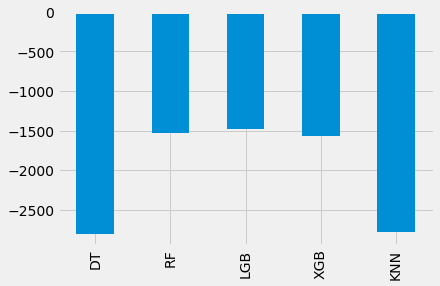

In [ ]:
pd.Series(score).plot(kind='bar') #수치가 작을수록 원본과의 오차가 적음 -> DT

In [ ]:
regr1 = DecisionTreeRegressor(max_depth = 3)
regr1.fit(train_x, train_y)
y_1 = regr1.predict(test_x)
y_1

array([ 27.72404372, 225.72807018,  36.17857143,  27.72404372,
        36.17857143,  86.89071038, 130.10559006, 225.72807018,
        27.72404372, 136.68852459, 225.72807018, 225.72807018,
       149.5       ,  27.72404372, 225.72807018, 149.5       ,
        27.72404372, 225.72807018, 225.72807018, 149.5       ,
       225.72807018,  27.72404372,  27.72404372, 149.5       ,
       149.5       ,  86.89071038,  27.72404372,  86.89071038,
        86.89071038, 149.5       ,  59.58677686,  27.72404372,
        59.58677686, 149.5       , 225.72807018,  27.72404372,
       149.5       ,  36.17857143, 225.72807018,  27.72404372,
        59.58677686,  86.89071038, 136.68852459,  86.89071038,
       225.72807018, 225.72807018,  27.72404372,  59.58677686,
        27.72404372,  59.58677686, 225.72807018,  59.58677686,
       136.68852459,  36.17857143, 149.5       , 136.68852459,
        27.72404372, 149.5       ,  27.72404372,  27.72404372,
        27.72404372,  86.89071038, 225.72807018, 225.72

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/따릉이/submission.csv")
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [ ]:
submission['count'] = y_1
submission

,id,count
0,0,27.724044
1,1,225.728070
2,2,36.178571
3,4,27.724044
4,5,36.178571
...,...,...
710,2148,59.586777
711,2149,59.586777
712,2165,86.890710
713,2166,225.728070


In [ ]:
submission.to_csv("따릉이.csv",index=False)